In [1]:
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy

from scipy.stats import probplot
from scipy import stats
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

# Chapter02 2번 문제

In [2]:
a = '찬성 찬성 찬성 무응답 찬성 무응답 찬성 반대 무응답 찬성 반대 무응답 찬성 반대 찬성 반대 찬성 찬성 무응답 찬성 찬성 반대 찬성 찬성 찬성 찬성 무응답 찬성 찬성 무응답 찬성 무응답 찬성 찬성 찬성 반대 반대 찬성 찬성 찬성 반대 반대 찬성 찬성 찬성 반대 반대 무응답 찬성 찬성 반대 찬성 반대 찬성 무응답 찬성 찬성 무응답 찬성 무응답 반대 찬성 찬성 반대 찬성 반대 찬성 반대 반대 찬성 찬성 반대 찬성 반대 찬성 찬성 반대 찬성 찬성 찬성 찬성 반대 반대 찬성 찬성 찬성 찬성 무응답 찬성 찬성 반대 찬성 찬성 찬성 반대 반대 찬성 반대 반대 무응답'
b = []
for i in a.split(' '):
    b.append(i)
print(b)
print(len(b))

['찬성', '찬성', '찬성', '무응답', '찬성', '무응답', '찬성', '반대', '무응답', '찬성', '반대', '무응답', '찬성', '반대', '찬성', '반대', '찬성', '찬성', '무응답', '찬성', '찬성', '반대', '찬성', '찬성', '찬성', '찬성', '무응답', '찬성', '찬성', '무응답', '찬성', '무응답', '찬성', '찬성', '찬성', '반대', '반대', '찬성', '찬성', '찬성', '반대', '반대', '찬성', '찬성', '찬성', '반대', '반대', '무응답', '찬성', '찬성', '반대', '찬성', '반대', '찬성', '무응답', '찬성', '찬성', '무응답', '찬성', '무응답', '반대', '찬성', '찬성', '반대', '찬성', '반대', '찬성', '반대', '반대', '찬성', '찬성', '반대', '찬성', '반대', '찬성', '찬성', '반대', '찬성', '찬성', '찬성', '찬성', '반대', '반대', '찬성', '찬성', '찬성', '찬성', '무응답', '찬성', '찬성', '반대', '찬성', '찬성', '찬성', '반대', '반대', '찬성', '반대', '반대', '무응답']
100


In [3]:
import collections

hashes = collections.Counter(b)
x = list(hashes.keys())
y = list(hashes.values())
print(list(zip(x,y))) #zip은 각 index 별로 묶어준다.
c = pd.DataFrame(list(zip(x,y))  , columns = ['응답' , '투표'])

c

[('찬성', 58), ('무응답', 14), ('반대', 28)]


,응답,투표
0,찬성,58
1,무응답,14
2,반대,28


In [4]:
ratio = []
for i in c['투표']:
    ratio.append(round(i/sum(c['투표']),2)*100)

c['투표비율'] = pd.Series(ratio)
c

,응답,투표,투표비율
0,찬성,58,58.0
1,무응답,14,14.0
2,반대,28,28.0


In [5]:
c.dtypes

응답       object
투표        int64
투표비율    float64
dtype: object

58
14
28


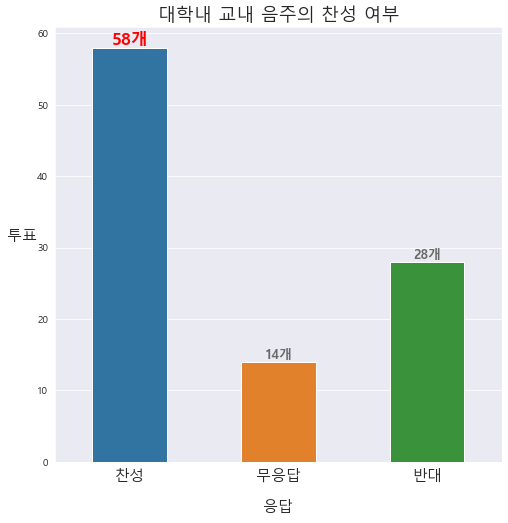

In [7]:
fig = plt.figure(figsize = (8,8))
ax3 = plt.plot(figsize = (8,8))
fig.set_facecolor('white')

ax3 = sns.barplot(x=c['응답'] , y=c['투표'])
ax3.set_title('대학내 교내 음주의 찬성 여부' , fontsize= 18)
ax3.set_xlabel('응답' , rotation = 0 , fontsize= 15 , labelpad=15)
ax3.set_ylabel('투표', rotation = 0 , fontsize = 15 , labelpad=15)
ax3.set_xticklabels(c['응답'], rotation = 0 , fontsize= 15)
width = 0.5
# 막대기의 두께 in Seaborn
for bar in ax3.patches:
    x = bar.get_x() # 막대 좌측 하단 x 좌표
    old_width = bar.get_width() # 기존 막대 폭
    bar.set_width(width) # 폭변경
    bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트

for i,txt in enumerate(c['투표']):
    b = txt
    print(b)
    if  b == max(c['투표']):
        ax3.text(i, b+0.4, str(txt)+'개' , ha='center' , color = 'red' , fontweight = 'bold' , fontsize=17)
        #어디 막대, 막대기의 위쪽에
    else:
        ax3.text(i, b+0.5, str(txt)+'개' , ha='center' , color = 'dimgray' , fontsize=13 , fontweight = 'bold')
plt.show()

<ipython-input-8-03665155ed4a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(c['응답'], rotation = 0 , fontsize= 15)


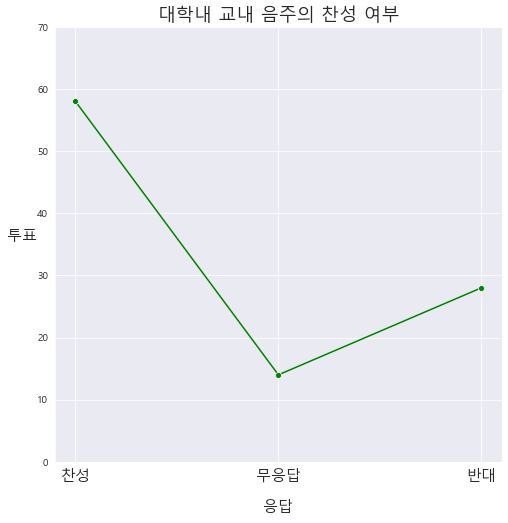

In [8]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')

ax2 = sns.lineplot(x=c['응답'] , y=c['투표'],  color='g', # 색상
                  linestyle='-', # 라인 스타일
                  marker='o') # 마커)
ax2.set_title('대학내 교내 음주의 찬성 여부' , fontsize= 18)
ax2.set_xlabel('응답' , rotation = 0 , fontsize= 15 , labelpad=15)
ax2.set_ylabel('투표', rotation = 0 , fontsize = 15 , labelpad=15)
ax2.set_xticklabels(c['응답'], rotation = 0 , fontsize= 15)
ax2.set_ylim(0, 70) #y축의 범위 지정
plt.show()

58.0
왜
14.0
28.0


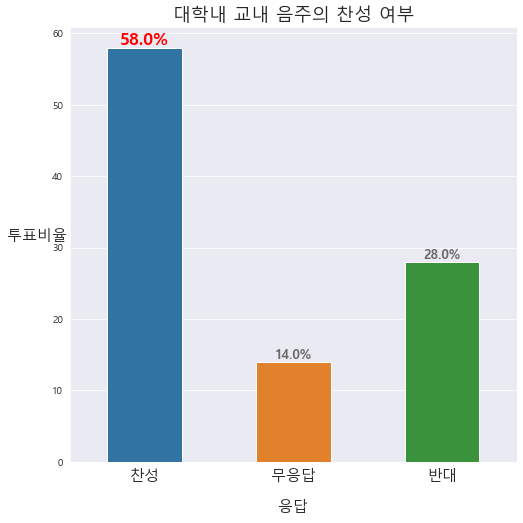

In [9]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')

ax = sns.barplot(x=c['응답'] , y=c['투표비율'])
ax.set_title('대학내 교내 음주의 찬성 여부' , fontsize= 18)
ax.set_xlabel('응답' , rotation = 0 , fontsize= 15 , labelpad=15)
ax.set_ylabel('투표비율', rotation = 0 , fontsize = 15 , labelpad=15)
ax.set_xticklabels(c['응답'], rotation = 0 , fontsize= 15)
width = 0.5
# 막대기의 두께 in Seaborn
for bar in ax.patches:
    x = bar.get_x() # 막대 좌측 하단 x 좌표
    old_width = bar.get_width() # 기존 막대 폭
    bar.set_width(width) # 폭변경
    bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트

for i,txt in enumerate(round(c['투표비율'],2)): #근데 왜 round 해야하는지는 모르겠다.
    b = txt
    print(b)
    if  b == max(round(c['투표비율'],2)):
        print('왜')
        ax.text(i, b+0.4, str(txt)+'%' , ha='center' , color = 'red' , fontweight = 'bold' , fontsize=17)
        #어디 막대, 막대기의 위쪽에
    else:
        ax.text(i, b+0.5, str(txt)+'%' , ha='center' , color = 'dimgray' , fontsize=13 , fontweight = 'bold')

<ipython-input-10-a75bd27c05da>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(c['응답'], rotation = 0 , fontsize= 15)


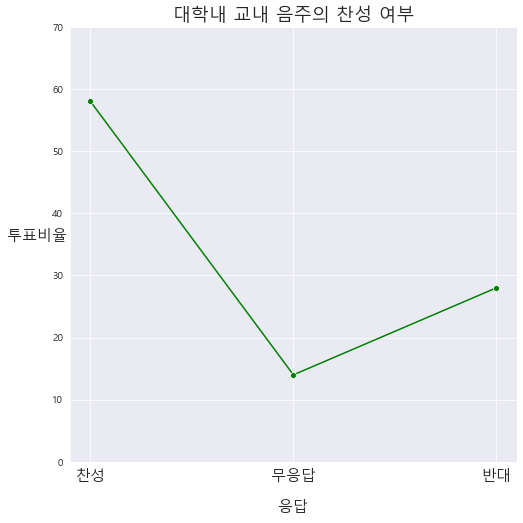

In [10]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')

ax2 = sns.lineplot(x=c['응답'] , y=c['투표비율'],  color='g', # 색상
                   linestyle='-', # 라인 스타일
                   marker='o') # 마커)
ax2.set_title('대학내 교내 음주의 찬성 여부' , fontsize= 18)
ax2.set_xlabel('응답' , rotation = 0 , fontsize= 15 , labelpad=15)
ax2.set_ylabel('투표비율', rotation = 0 , fontsize = 15 , labelpad=15)
ax2.set_xticklabels(c['응답'], rotation = 0 , fontsize= 15)
ax2.set_ylim(0, 70) #y축의 범위 지정
plt.show()

([<matplotlib.patches.Wedge at 0x2153f2c1520>,
 [Text(-0.29842780365730354, 1.1622998090012222, '찬성'),
  Text(-0.705342402735206, -0.9708203206071278, '무응답'),
  Text(0.7649086976668847, -0.9246159658115093, '반대')],
 [Text(-0.14921390182865177, 0.5811499045006111, '58.0%'),
  Text(-0.352671201367603, -0.4854101603035639, '14.0%'),
  Text(0.38245434883344237, -0.46230798290575464, '28.0%')])

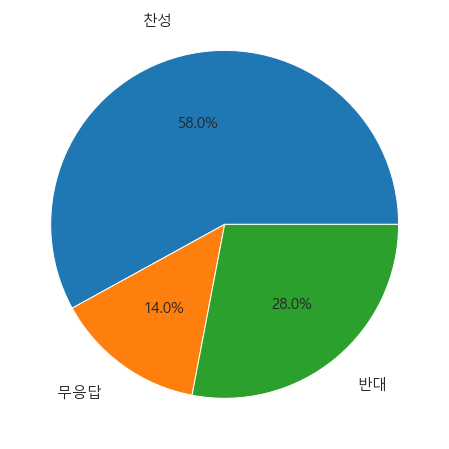

In [11]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

colors = sns.color_palette('bright')[0:5]

plt.pie(c.loc[:,'투표비율'] , labels=c.loc[:,'응답'], labeldistance=1.2, autopct='%.1f%%' ,textprops={'fontsize' : 15})